# Radial and Vertical Perturbation to Planetary Orbit

Two general scenarios will be examined: the first involves a single planet orbiting the primary star, and the second involves a pertubed planet and other planets orbiting the primary. In each case, perturbations will be applied one at a time, and the system will be allowed to evolve for several hundred orbits to observe its evolution.

### Case I: Only Planet - Radial Perturbation

In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Creating a new simulation and defining the units
sim = rebound.Simulation()
sim.units = ('AU', 'yr', 'Msun')  # Astronomical units, years, solar masses

In [3]:
#Add the central star which is Sun-like
sim.add(m=1.0)

In [4]:
#A planet with an initial semi-major axis of 1 AU and a small eccentricity 
a_initial = 1.0 
e_initial = 0.2  
sim.add(m=1e-6, a=a_initial, e=e_initial)

In [5]:
# Apply a small perturbation to the semi-major axis 
perturbation_factor = 0.05  # 5% increase
sim.particles[1].a *= (1 + perturbation_factor) 
sim.move_to_com()

In [6]:
#Time integration setup
N_steps = 5000 # Number of steps
t_max = 1000 #Time (in years)
times = np.linspace(0, t_max, N_steps)

#Storing orbital elements over time
a_values, e_values = [], []

#Simulation
for t in times:
    sim.integrate(t) 
    planet = sim.particles[1]  #gets the latest state of the planet after integration
    a_values.append(planet.a)  
    e_values.append(planet.e) 

In [7]:
#Plotting the results
plt.figure(figsize=(10, 5),dpi = 1000)
plt.subplot(1, 2, 1)
plt.plot(times, a_values, label="Semi-major axis (AU)")
plt.xlabel("Time (years)")
plt.ylabel("Semi-major axis (AU)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(times, e_values, label="Eccentricity", color='r')
plt.xlabel("Time (years)")
plt.ylabel("Eccentricity")
plt.legend()

plt.tight_layout()
plt.suptitle("Planet with Radial Perturbation", y=1.01)
plt.show()

### Case I: Only Planet - Vertical Perturbation 

In [8]:
#Defining the Simulation
sim1 = rebound.Simulation()
sim1.units = ('AU', 'yr', 'Msun')  # Astronomical units, years, solar masses

In [9]:
#The central star
sim1.add(m=1.0)  # Sun-like star

# Adding a planet with an initial semi-major axis of 1 AU
a_initial = 1.0  # AU
e_initial = 0.1  # Small eccentricity
inclination = 0.523599 #30 degrees

sim1.add(m=1e-6, a=a_initial, e=e_initial, inc=inclination)  # Planet
planet = sim.particles[1]

In [10]:
#Applying a small perturbation in the z-direction
perturbation_z = 0.05  # AU (small displacement in z)
planet.z += perturbation_z  # Shift in the planet's position in the z-axis
sim1.move_to_com()

In [11]:
#Time integration setup
N_steps = 500  #Number of steps
t_max = 5000  #Integration time (years)
times = np.linspace(0, t_max, N_steps)

#Updated z and inc values will be stored
z_values, inc_values = [], []

for t in times:
    sim1.integrate(t)  
    planet = sim1.particles[1]
    z_values.append(planet.z)  
    inc_values.append(planet.inc * 180 / np.pi)  

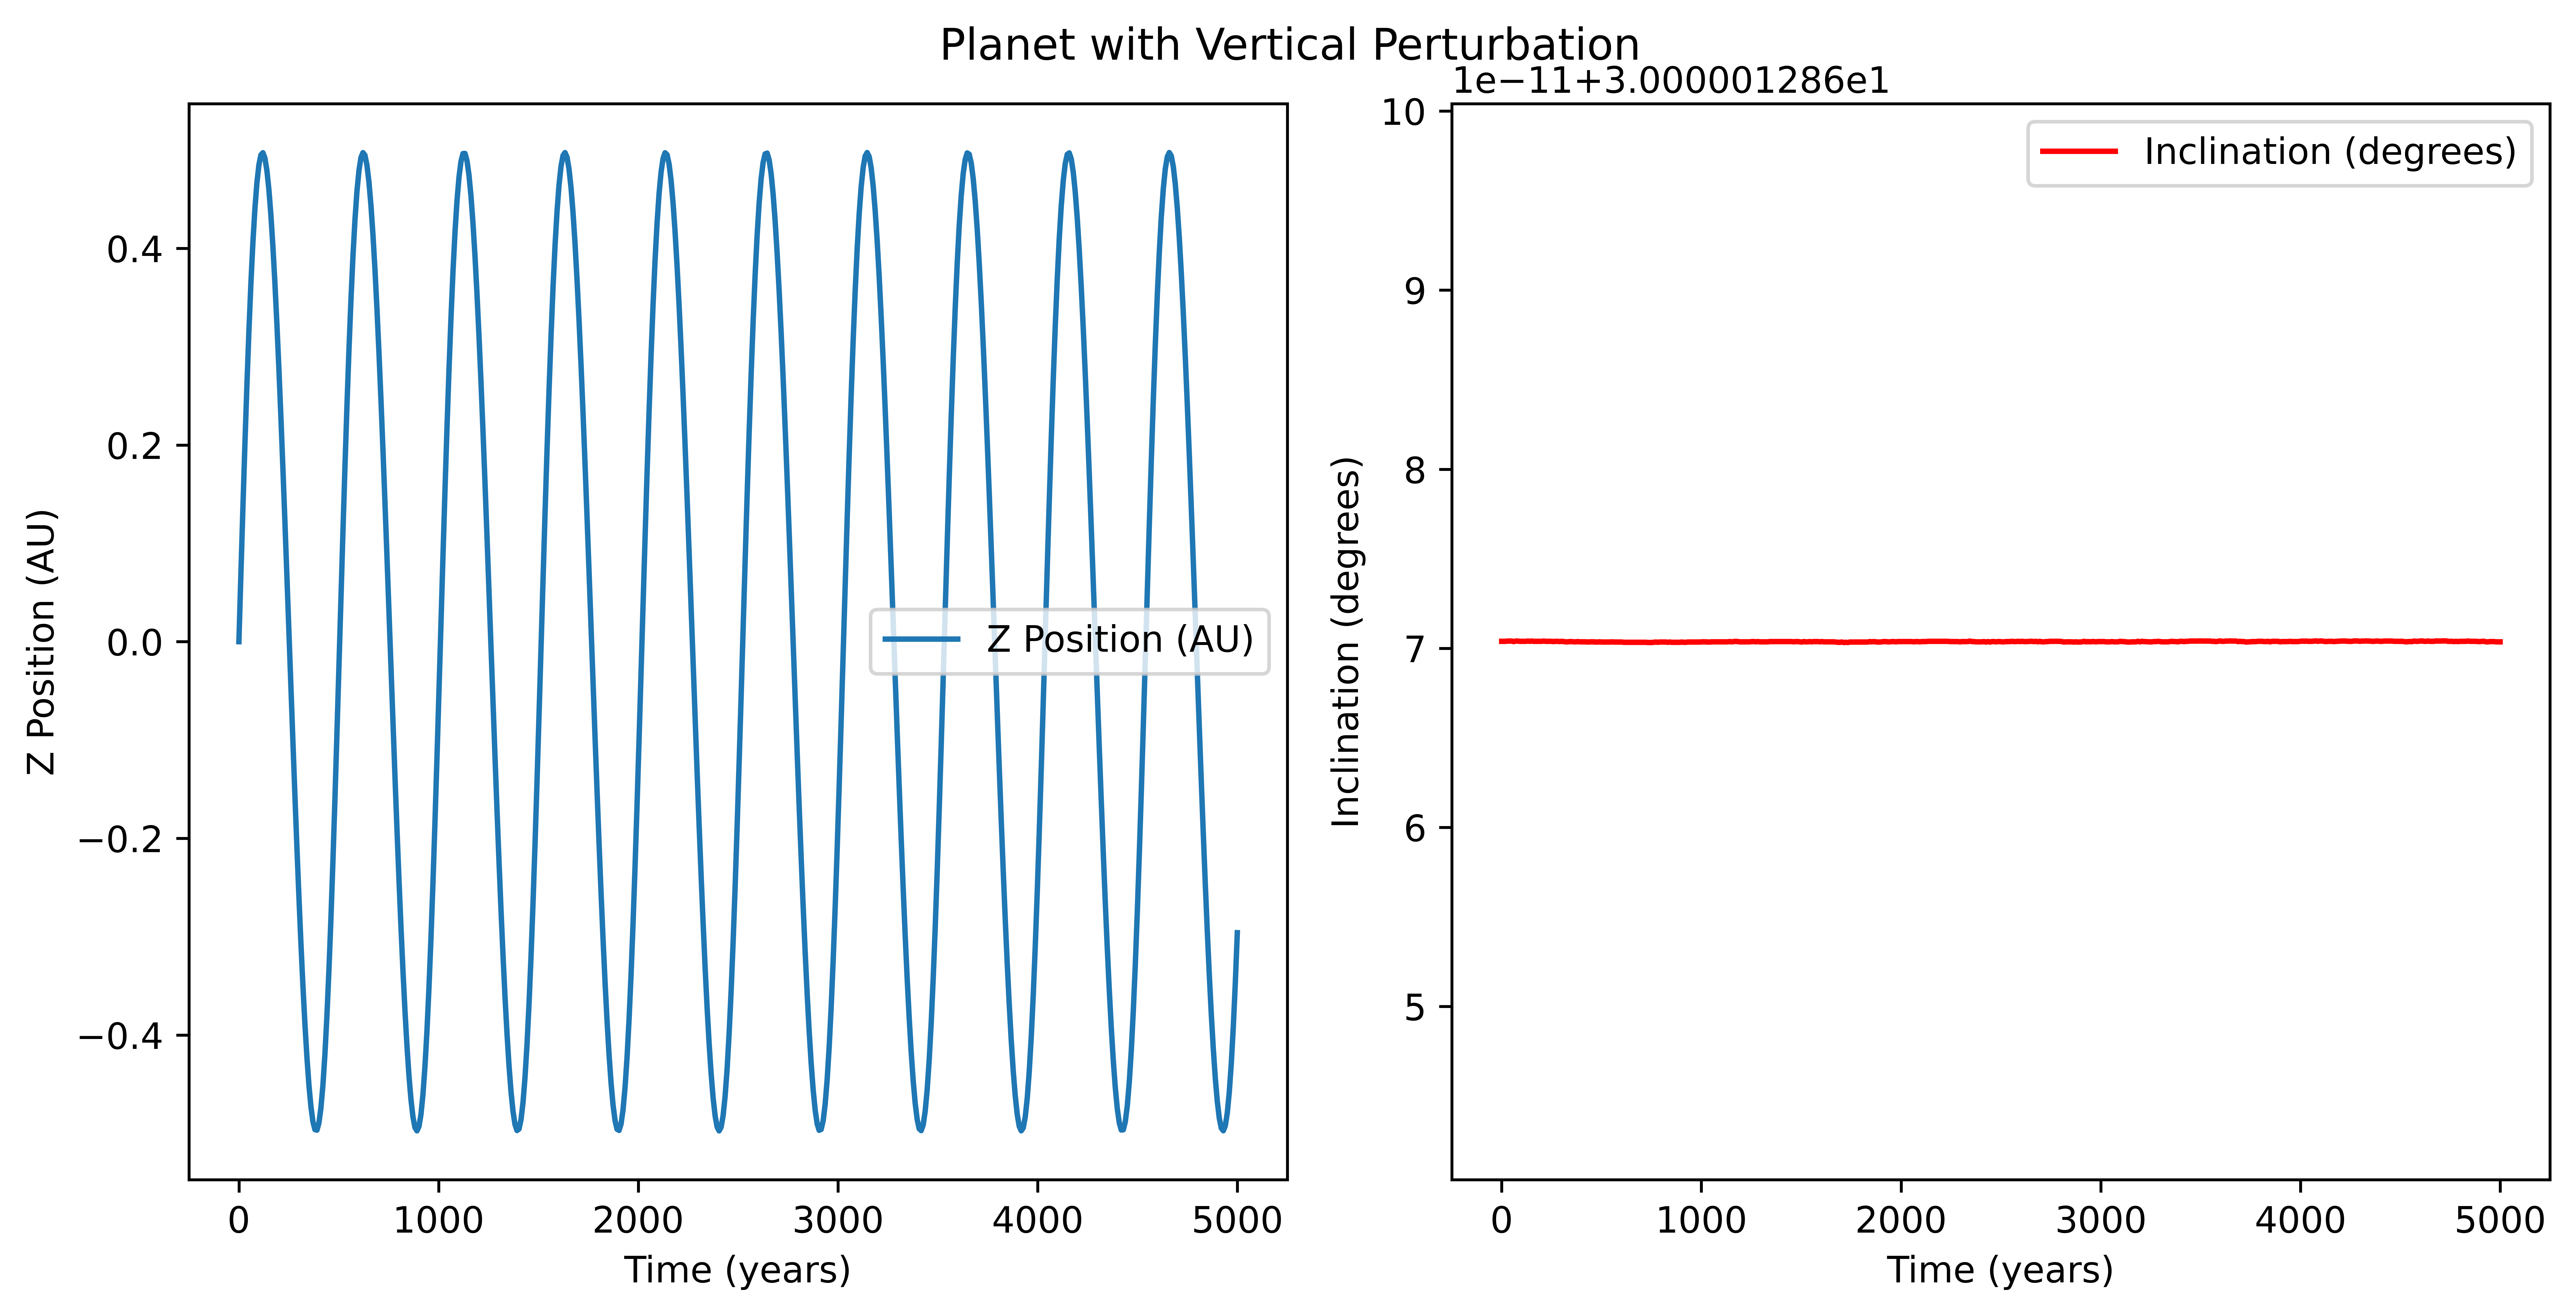

In [12]:
#Plotting the results
plt.figure(figsize=(10, 5), dpi = 1000)

plt.subplot(1, 2, 1)
plt.plot(times, z_values, label="Z Position (AU)")
plt.xlabel("Time (years)")
plt.ylabel("Z Position (AU)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(times, inc_values, label="Inclination (degrees)", color='r')
plt.xlabel("Time (years)")
plt.ylabel("Inclination (degrees)")
plt.legend()

plt.tight_layout()
plt.suptitle("Planet with Vertical Perturbation", y=1.0)
plt.show()

#### Note: Adding Pertubation
As the semi-major axis is a scale parameter (i.e., dependent on x,y,z), `*=` is used to increase by percentage (scaling). However, as z is the position of the object in real-time, `+=` is used to displace the planet slightly (shifting).  
In the above case, the oscillatory behaviour in z is not due to the small perturbation but due to the inclined orbit of the planet.  

### Case II: A System with Multiple Planets - Radial Perturbation

In [13]:
#Adding the Particles for Simulation
sim2 = rebound.Simulation()
sim2.units = ('AU', 'yr', 'Msun')
sim2.add(m=1)
sim2.add(m=1e-15, a = 1, e=0.1, inc = 0)
sim2.add(m=1e-6, a = 5, e=0.1, inc = 0)
sim2.add(m=1e-6, a = 7, e=0.1, inc = 0)
sim2.add(m=1e-6, a = 9, e=0.1, inc = 0)
sim2.add(m=1e-6, a = 14, e=0.1, inc = 0)

plnt = sim2.particles[1]

In [14]:
pertubation_r = 0.10 #defining the perturbation
plnt.a *= (1 + pertubation_r)
sim2.move_to_com()

In [15]:
steps = 10000 #steps of the simulation
time = 100 #integration time (yr)

a_updated,e_updated = [],[]

series = np.linspace(0,time,steps)

for t in series:
    sim2.integrate(t)
    plnt = sim2.particles[1]
    a_updated.append(plnt.a)
    e_updated.append(plnt.e)  

In [16]:
#Plotting the results
plt.figure(figsize=(10, 5), dpi = 1000)

plt.subplot(1, 2, 1)
plt.plot(series, a_updated, label="Semi-Major Axis (AU)")
plt.xlabel("Time (years)")
plt.ylabel("Semi Major Axis (AU)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(series, e_updated, label="Eccentricity", color='r')
plt.xlabel("Time (years)")
plt.ylabel("Eccentricity")
plt.legend()

plt.tight_layout()
plt.suptitle("Planets with Radial Perturbation", y=1.05)
plt.show()

## Case II: Planets with Vertical Perturbation

In [17]:
#Adding the Particles for Simulation
sim3 = rebound.Simulation()
sim3.units = ('AU', 'yr', 'Msun')
sim3.add(m=1)
sim3.add(m=1e-15, a = 1, e=0.1, inc = 0)
sim3.add(m=1e-6, a = 5, e=0.1, inc = 0)
sim3.add(m=1e-6, a = 7, e=0.1, inc = 0)
sim3.add(m=1e-6, a = 9, e=0.1, inc = 0)
sim3.add(m=1e-6, a = 14, e=0.1, inc = 0)

plnt1 = sim3.particles[1]

In [18]:
# Adding the Pertubation 
perturbation_z = 0.10 #percentage of the perturbation
plnt1.z += perturbation_z

sim3.move_to_com

<bound method Simulation.move_to_com of <rebound.simulation.Simulation object at 0x21f174f60d0, N=6, t=0.0>>

In [19]:
steps = 1000
time = 50

z_new, inc_new = [],[]

time_series = np.linspace(0, time, steps)

for t in time_series:
    sim3.integrate(t)
    plnt1 = sim3.particles[1]
    z_new.append(plnt1.z)
    inc_new.append(plnt1.inc*180/np.pi)

In [20]:
#Plotting the results
plt.figure(figsize=(10, 5), dpi = 1000)

plt.subplot(1, 2, 1)
plt.plot(time_series, z_new, label="Vertical Position")
plt.xlabel("Time (years)")
plt.ylabel("Vertical (z)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(time_series, inc_new, label="Inclination", color='r')
plt.xlabel("Time (years)")
plt.ylabel("Inclination")
plt.legend()

plt.tight_layout()
plt.suptitle("Planets with Vertical Perturbation", y=1.05)
plt.show()

A small perturbation does not have a significant effect over time when only a single planet is orbiting the Sun; it tends to be smoothed out. However, even a tiny perturbation can impact the orbital parameters of multiple planets, leading to considerable changes in some systems. Additionally, it is essential to determine whether the artifacts observed in the output plot are a result of the perturbation or the way the system is defined. To check this, one should set the perturbation to zero and see if the output changes. If it remains the same, then it's necessary to adjust the system parameters.